Our task is to Explore a available Dataset. Find the features with possible Outliers and apply pre-processing and normalizing techniques for those features.

In [36]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PowerTransformer

In [37]:
# loading the dataset from sklearn
wine = ds.load_wine()
X = wine.data
y = wine.target

In [38]:
# print class names

class_names = wine.target_names

for i, name in enumerate(class_names):
    print(f"Class {i}: {name}")

Class 0: class_0
Class 1: class_1
Class 2: class_2


In [39]:
# print feature names

print("Feature names: ", wine.feature_names)

Feature names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [40]:
# describe the dataset

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [41]:
# Describe the Whole Data set

df.describe()

NameError: name 'df' is not defined

In [ ]:
# visualize tha data

df = pd.DataFrame(X, columns=wine.feature_names)
df['Class'] = wine.target_names[y]

# plot the data
# sns.pairplot(df, hue="Class", palette="husl", markers=["o", "s", "^"],diag_kind="kde")

# This dataset has variuos features, so we can't visualize it in 2D or 3D

To identify potential outliers, you can consider values that are significantly higher or lower than the quartiles. Outliers could be defined as values that are outside a certain range from the quartiles, for example, values that are more than 1.5 times the interquartile range (IQR) below the 25th percentile or above the 75th percentile

In [ ]:
# identifying the features with outliers

# Calculating necessary Statistics

mean_values = np.mean(X, axis=0)
variance_values = np.var(X, axis=0)
q1_values = np.percentile(X, 25, axis=0)
q3_values = np.percentile(X, 75, axis=0)


# print(mean_values)
# print(variance_values)
# print(q1_values)
# print(q3_values)

In [ ]:
#identifying outliers

iqr = q3_values - q1_values
lower_bound = q1_values - 1.5 * iqr
upper_bound = q3_values + 1.5 * iqr

outliers = np.logical_or(X < lower_bound, X > upper_bound)


NameError: name 'q3_values' is not defined

In [ ]:

# select the features and labels

num_outliers_per_feature = np.sum(outliers, axis=0)
selected_feature_indices = np.argsort(num_outliers_per_feature)[-2:]  # Select features with the most outliers
print("Selected Feature Indices:", selected_feature_indices)
for x in range(len(selected_feature_indices)):
    selected_features = wine.feature_names[selected_feature_indices[x]]
    print("Selected Features:", selected_features)
    



NameError: name 'lower_bound' is not defined

So the Selected Features with outliers are "Magnesium" and "Color_Intensity"

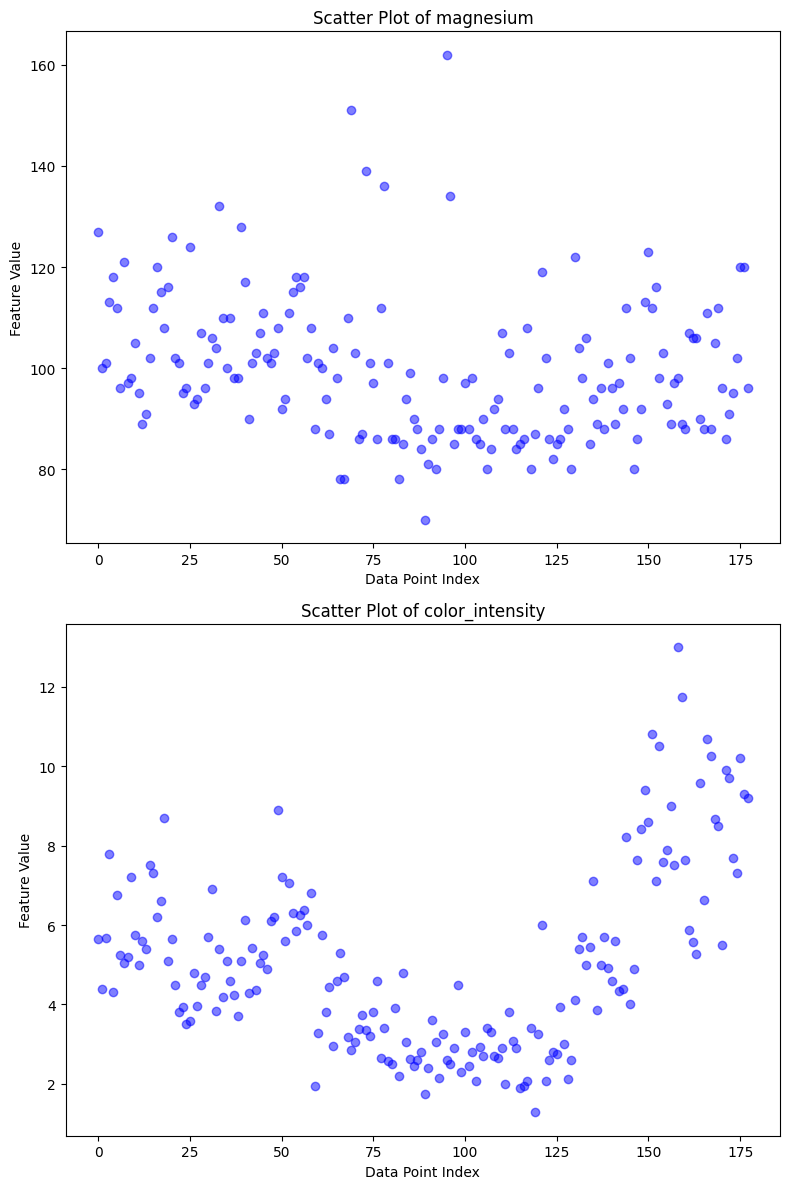

In [ ]:
# Visualizing the selected features with Outliers

num_plots = len(selected_feature_indices)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6*num_plots))

for idx, feature_idx in enumerate(selected_feature_indices):
    selected_feature_values = X[:, feature_idx]
    
    ax = axes[idx]
    ax.scatter(range(len(selected_feature_values)), selected_feature_values, c='blue', alpha=0.5)
    ax.set_title(f'Scatter Plot of {wine.feature_names[feature_idx]}')
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel('Feature Value')

plt.tight_layout()
plt.show()


Applying Pre-processing and Normalization Techniques

1. STANDARD SCALER

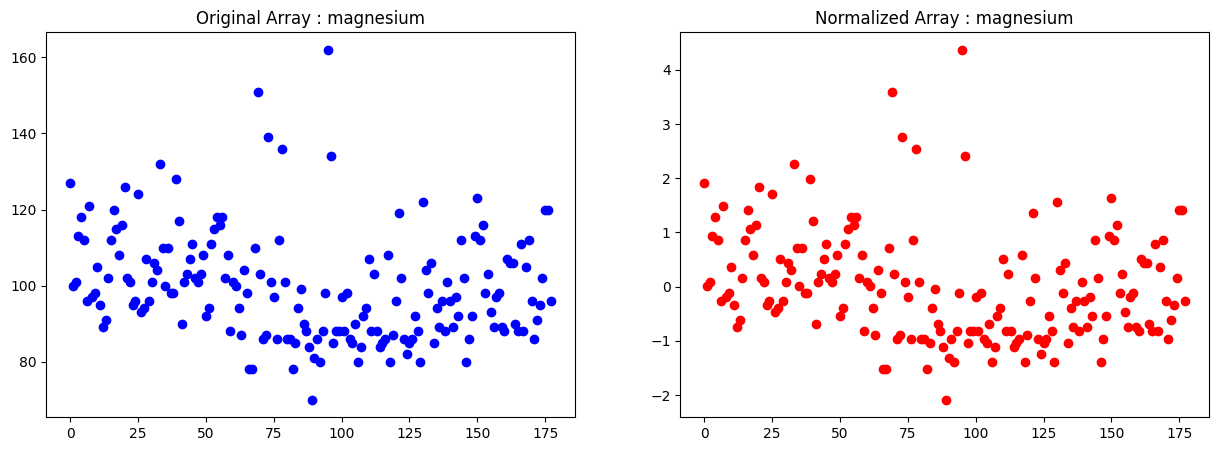

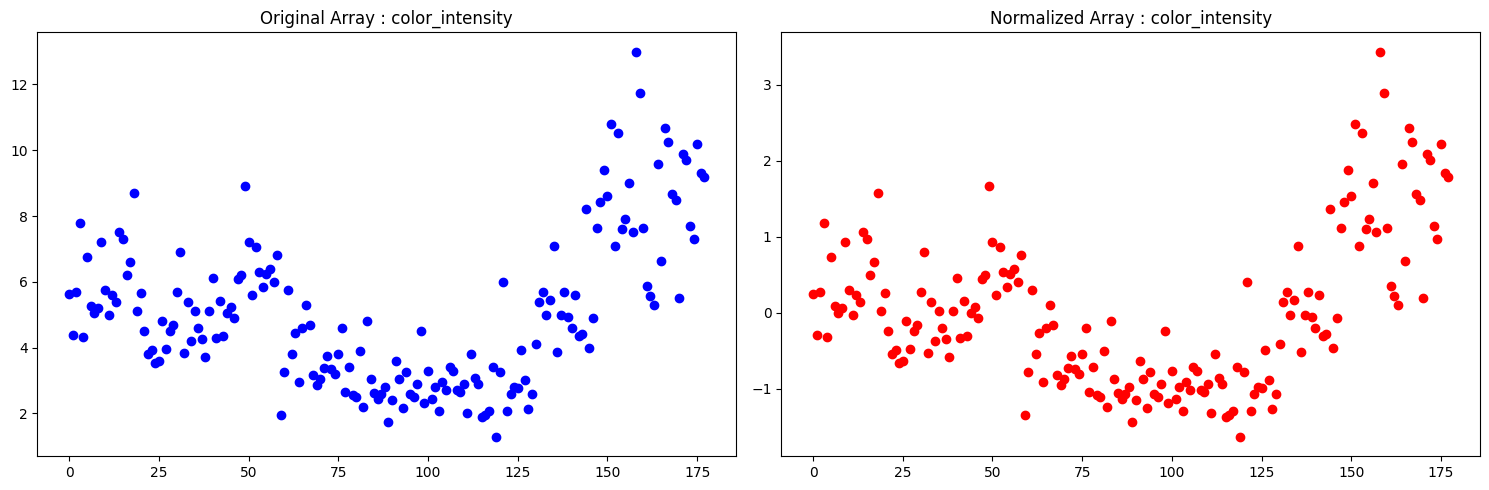

In [ ]:
for idx, feature_idx in enumerate(selected_feature_indices):
    selected_feature= X[:,feature_idx]
    feature_name=wine.feature_names[feature_idx]


    feature_array_reshaped = selected_feature.reshape(-1,1)

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the original array
    normalized_array = scaler.fit_transform(feature_array_reshaped)


    # Plot the original array
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(selected_feature)), selected_feature, color='blue', label='Original')
    plt.title("Original Array : "+feature_name)

    # Plot the normalized array
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(normalized_array)), normalized_array, color='red', label='Normalized')
    plt.title("Normalized Array : "+feature_name)

    
    

plt.tight_layout()
plt.show()

2. MINMAXSCALER

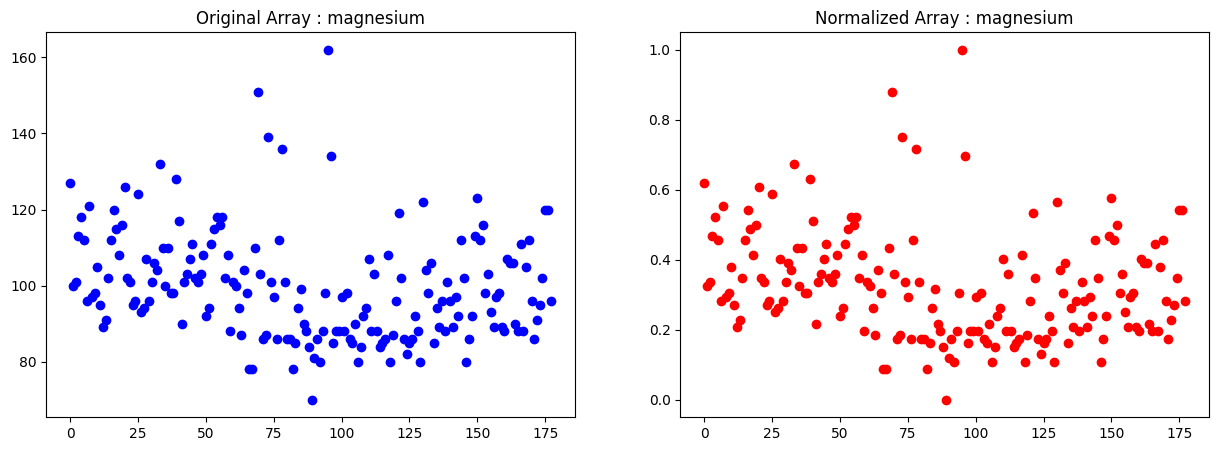

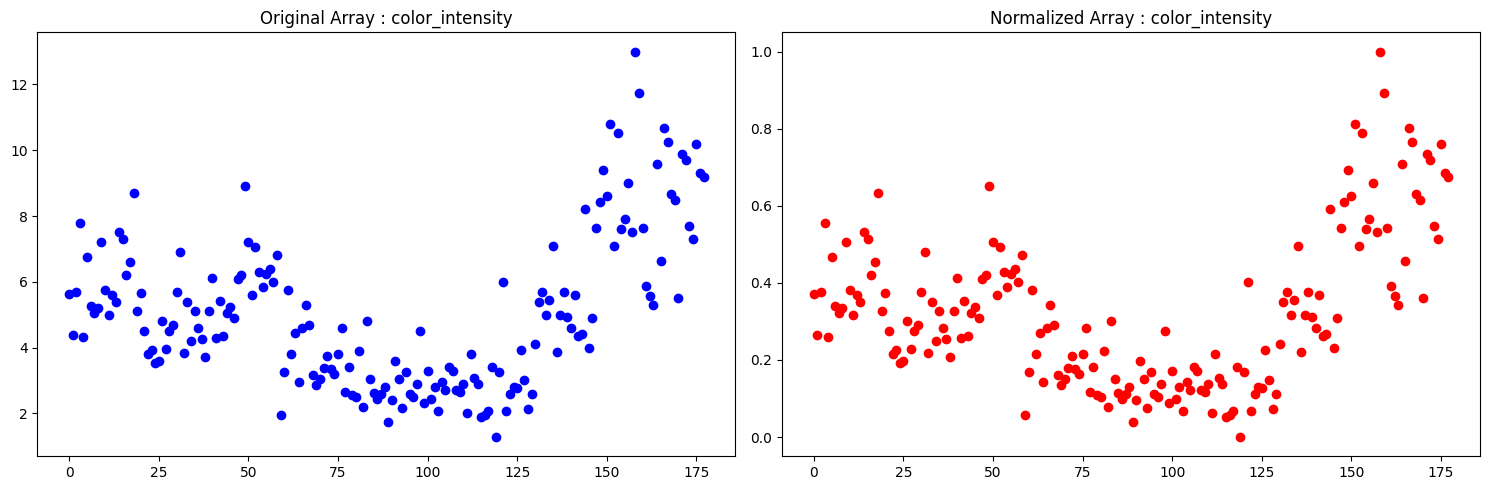

In [ ]:
for idx, feature_idx in enumerate(selected_feature_indices):
    selected_feature= X[:,feature_idx]
    feature_name=wine.feature_names[feature_idx]


    feature_array_reshaped = selected_feature.reshape(-1,1)

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit and transform the original array
    normalized_array = scaler.fit_transform(feature_array_reshaped)


    # Plot the original array
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(selected_feature)), selected_feature, color='blue', label='Original')
    plt.title("Original Array : "+feature_name)

    # Plot the normalized array
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(normalized_array)), normalized_array, color='red', label='Normalized')
    plt.title("Normalized Array : "+feature_name)

    
    

plt.tight_layout()
plt.show()


3. ROBUSTSCALAR

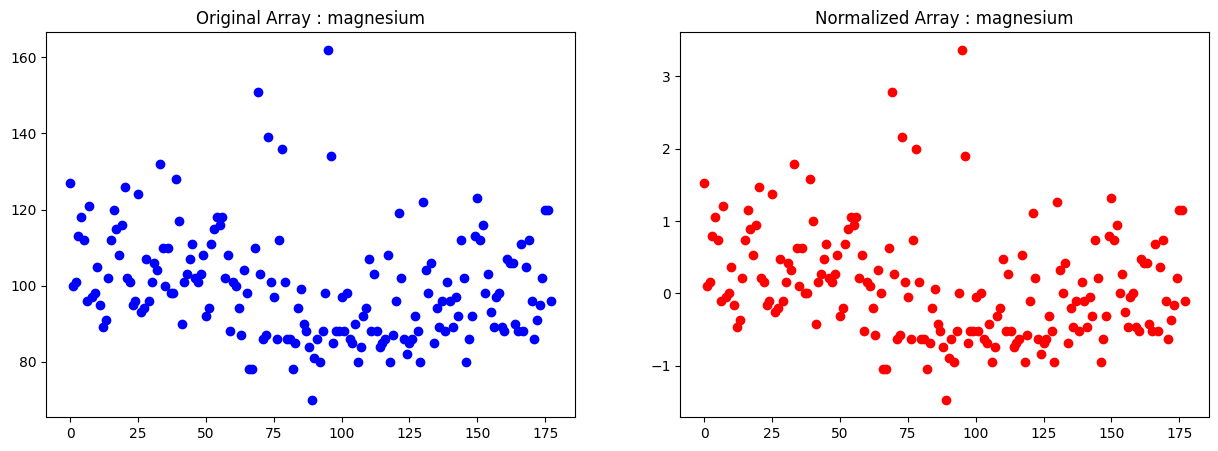

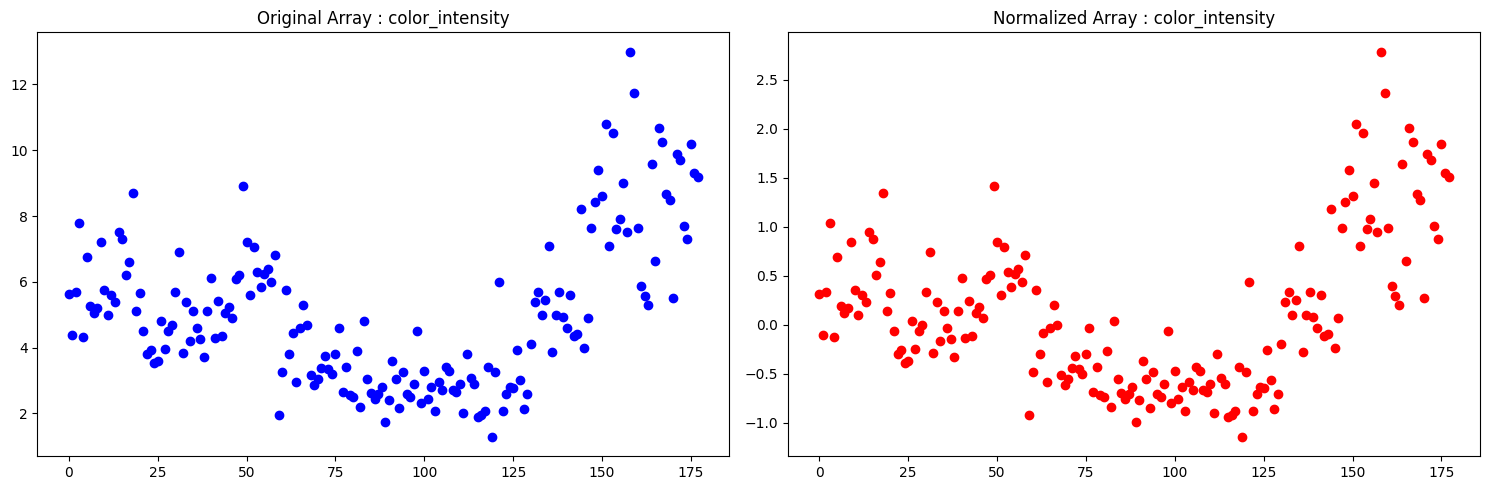

In [ ]:
for idx, feature_idx in enumerate(selected_feature_indices):
    selected_feature= X[:,feature_idx]
    feature_name=wine.feature_names[feature_idx]
   

    feature_array_reshaped = selected_feature.reshape(-1,1)

    # Initialize the RobustScaler
    scaler = RobustScaler()

    # Fit and transform the original array
    normalized_array = scaler.fit_transform(feature_array_reshaped)


    # Plot the original array
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(selected_feature)), selected_feature, color='blue', label='Original')
    plt.title("Original Array : "+feature_name)

    # Plot the normalized array
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(normalized_array)), normalized_array, color='red', label='Normalized')
    plt.title("Normalized Array : "+feature_name)

    
    

plt.tight_layout()
plt.show()


4. POWERTRANSFORMER

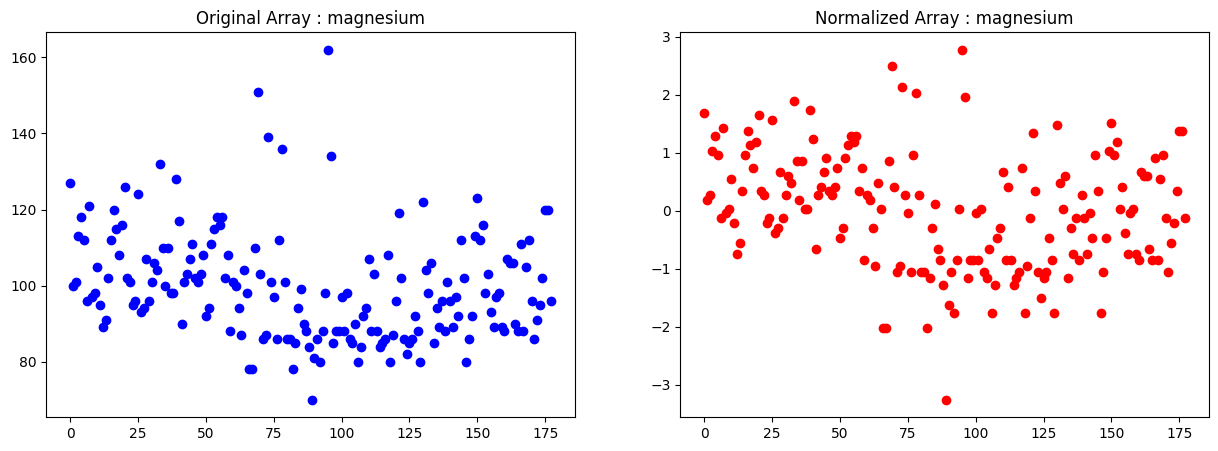

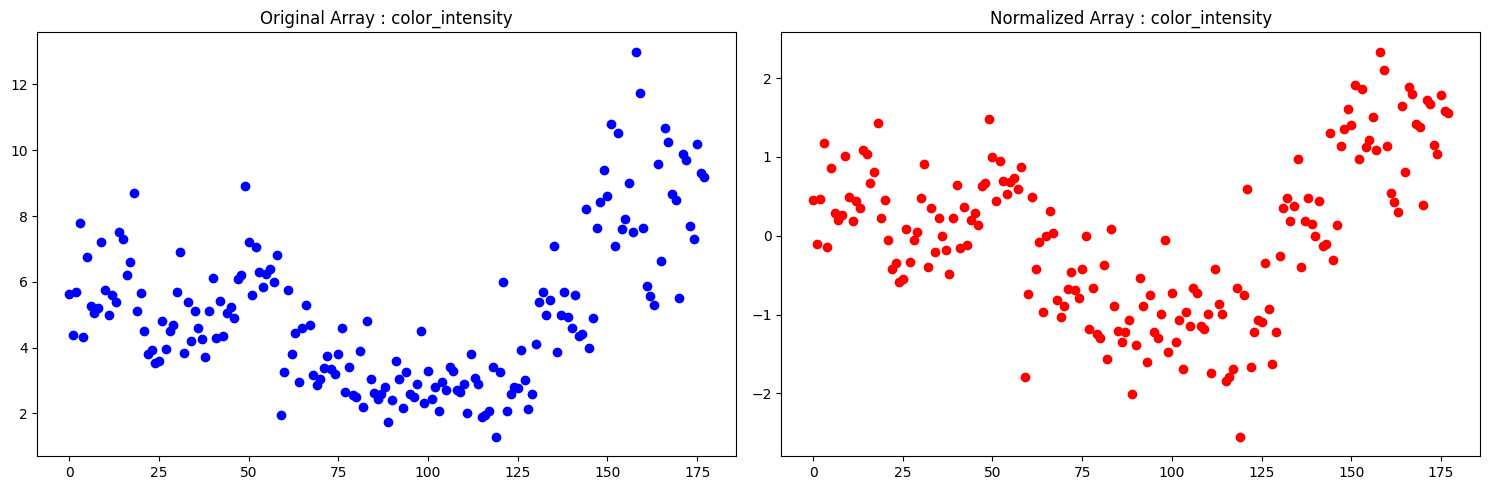

In [ ]:
for idx, feature_idx in enumerate(selected_feature_indices):
    selected_feature= X[:,feature_idx]
    feature_name=wine.feature_names[feature_idx]
  

    feature_array_reshaped = selected_feature.reshape(-1,1)

    power_transformer = PowerTransformer(method='yeo-johnson')

    # Fit and transform the original array
    transformed_array = power_transformer.fit_transform(feature_array_reshaped)



    # Plot the original array
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(range(len(selected_feature)), selected_feature, color='blue', label='Original')
    plt.title("Original Array : "+feature_name)

    # Plot the normalized array
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(transformed_array)), transformed_array, color='red', label='Normalized')
    plt.title("Normalized Array : "+feature_name)

    
    

plt.tight_layout()
plt.show()
